# Introdução
___
Este arquivo tem por objetivo realizar o tratamento de dados do arquivo `cs_bisnode_panel.csv`.

### Objetivos do tratamento de dados:
* Remova as colunas ['COGS', 'finished_prod', 'net_dom_sales', 'net_exp_sales', 'wages', 'D']  pois elas apresentam um percentual considerável de missing data ✅
* Remova de seus dados os registros do ano de 2016 ✅
* Criar uma coluna para variavel resposta (use o conceito de que uma empresa deixou de operar se ela esteve ativa no
ano X, mas não apresentou vendas em X + 2 anos) `# trabalhar nisso`
* Filtre para trabalhar apenas com empresas do ano de 2012 ✅
* usar np.where para ajustar Sales < 0 você já pode substituir por 0 ✅
* * Criar uma nova coluna para a escala logaritima de `Sales`✅
* Essa variável (`Sales`) é bastante assimétrica, concorda? Será que vale criar novas
colunas que representem o valor em log  dessa coluna?✅
* Será que isso também se aplica para as demais? `checar isso durante o loop de retreinamento`
* Crie novas colunas, como idade da empresa (faça isso pela subtração de
founded_year  e year ). Ah, cuide bem dos missing values. np.where pode ajudar
bastante!✅
* Filtre seus dados para ter empresas que possuem receita (revenue) abaixo de 10
milhões de euros e acima de 1000 euros✅
* Busque sempre embasar qualquer decisão de tratamento das variáveis. Faça isso
com o auxílio de estatísticas descritivas e também de gráficos de apoio.✅


# Importação dos dados e tratamento

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import pywedge

In [73]:
#pip install --upgrade missingno

In [74]:
#pip install matplotlib==3.1.3


In [75]:
import missingno as msno

In [76]:
df = pd.read_csv("cs_bisnode_panel.csv")
df.head()

,comp_id,begin,end,COGS,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,...,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg
0,1001034.0,2005-01-01,2005-12-31,NaN,692.592590,7266.666504,7574.074219,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
1,1001034.0,2006-01-01,2006-12-31,NaN,603.703674,13122.222656,12211.111328,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
2,1001034.0,2007-01-01,2007-12-31,NaN,425.925934,8196.295898,7800.000000,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
3,1001034.0,2008-01-01,2008-12-31,NaN,300.000000,8485.185547,7781.481445,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
4,1001034.0,2009-01-01,2009-12-31,NaN,207.407410,5137.037109,15300.000000,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,0.083333


In [77]:
#msno.matrix(df)

Transformando as colunas de data para o foramto `dateTime`

In [78]:
df["begin"] = pd.to_datetime(df['begin'])
df["end"] = pd.to_datetime(df['end'])
df["year"] = pd.to_datetime(df['year'])

Checando valores faltantes na base de dados:

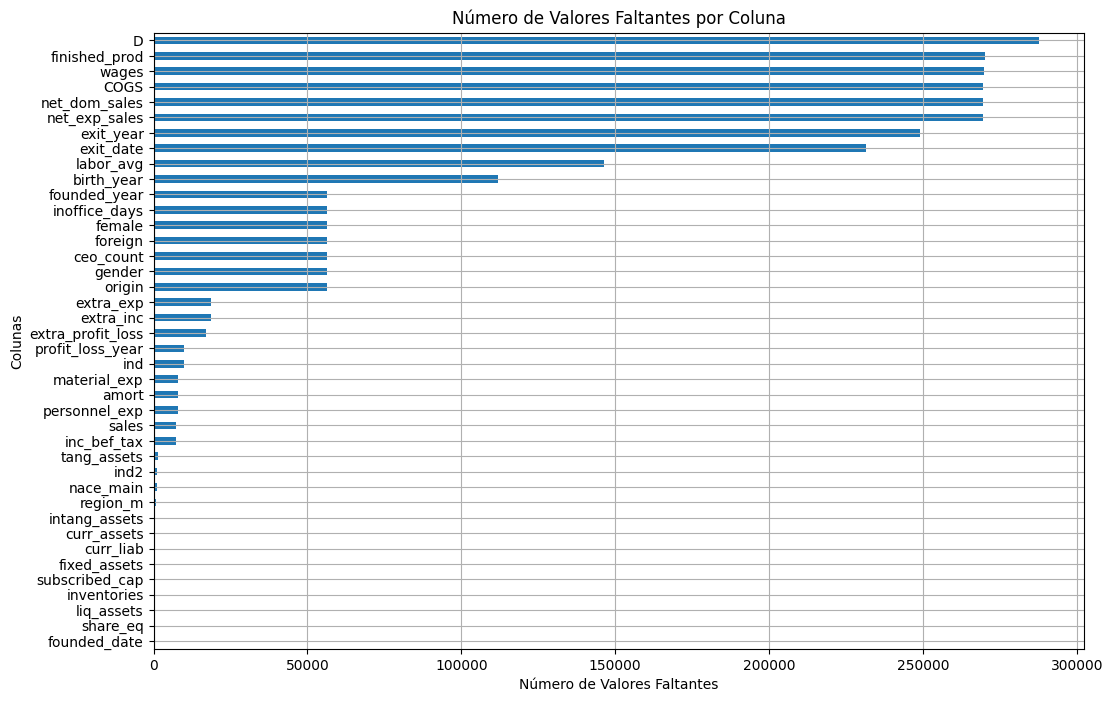

In [79]:
# Calcular o número de valores faltantes por coluna
missing_values = df.isnull().sum()

# Filtrar colunas com valores faltantes
missing_values = missing_values[missing_values > 0]

# Ordenar os valores em ordem decrescente
missing_values.sort_values(inplace=True)

# Criar um gráfico de barras horizontal
plt.figure(figsize=(12, 8))
missing_values.plot.barh()
plt.title('Número de Valores Faltantes por Coluna')
plt.xlabel('Número de Valores Faltantes')
plt.ylabel('Colunas')
plt.grid(True)
plt.show()

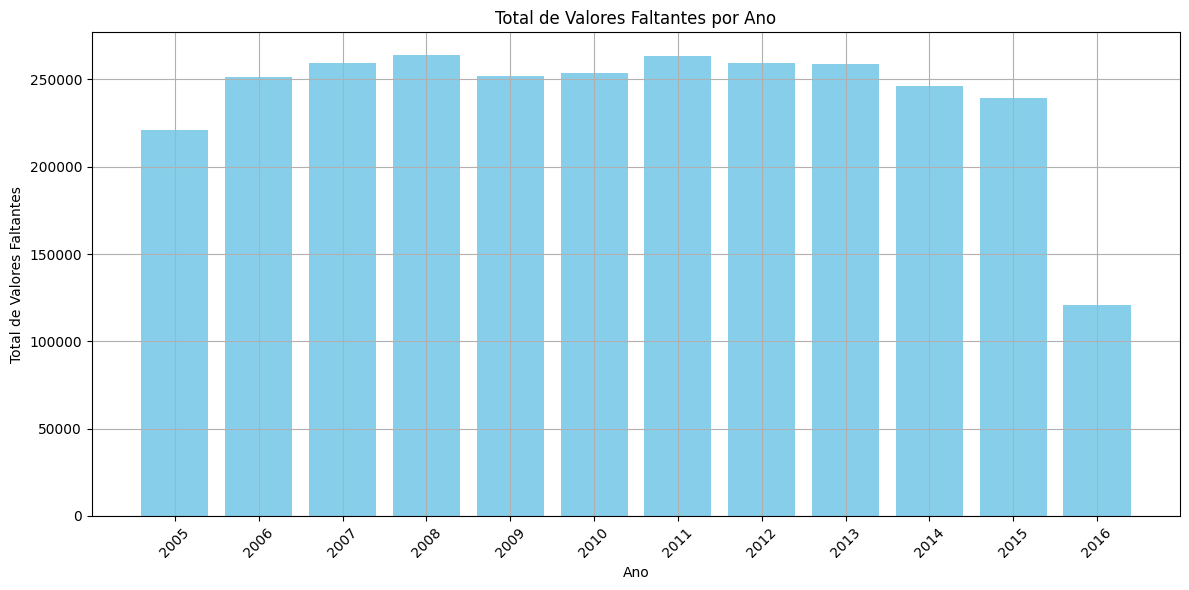

In [80]:
# Converter a coluna 'year' para tipo numérico (caso não esteja)
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Remover linhas onde 'year' é nulo
df = df[df['year'].notnull()]

# Calcular o número de valores faltantes por linha
df['missing_count'] = df.isnull().sum(axis=1)

# Agrupar por 'year' e somar o número de valores faltantes
missing_per_year = df.groupby('year')['missing_count'].sum().reset_index()

# Converter 'year' para inteiro
missing_per_year['year'] = missing_per_year['year'].astype(int)

# Ordenar os dados pelo ano
missing_per_year = missing_per_year.sort_values('year')

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(missing_per_year['year'], missing_per_year['missing_count'], color='skyblue')
plt.title('Total de Valores Faltantes por Ano')
plt.xlabel('Ano')
plt.ylabel('Total de Valores Faltantes')
plt.xticks(missing_per_year['year'], rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

In [81]:
df = df.drop(columns="missing_count")

## Removendo dados do ano de 2016
___

### convertendo as colunas para o formato datetime: 

In [82]:
# retinrando os dados em que o ano seja 2016 ou maior
df = df[df["year"] < 2016]
df.head()

,comp_id,begin,end,COGS,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,...,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg
0,1001034.0,2005-01-01,2005-12-31,NaN,692.592590,7266.666504,7574.074219,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
1,1001034.0,2006-01-01,2006-12-31,NaN,603.703674,13122.222656,12211.111328,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
2,1001034.0,2007-01-01,2007-12-31,NaN,425.925934,8196.295898,7800.000000,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
3,1001034.0,2008-01-01,2008-12-31,NaN,300.000000,8485.185547,7781.481445,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
4,1001034.0,2009-01-01,2009-12-31,NaN,207.407410,5137.037109,15300.000000,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,0.083333


## Criando a coluna indicadora de operação da empresa 
(se a empresa está operante em x+2 anos ou Não)

In [83]:
# Ordenando o DataFrame original por 'comp_id' e 'begin' para garantir a ordem cronológica
df_sorted = df.sort_values(by=['comp_id', 'begin'])

# Criando a variável resposta 'operates_within_2_years' no DataFrame ordenado
df_sorted['operates_within_2_years'] = df_sorted.groupby('comp_id')['sales'].shift(-2).gt(0).astype(int)

# Adicionando a nova coluna 'operates_within_2_years' de df_sorted ao df original
df['operates_within_2_years'] = df_sorted['operates_within_2_years']

In [84]:
# Verificando as primeiras linhas do df para garantir que a coluna foi adicionada corretamente
df[["comp_id", "sales", "operates_within_2_years"]].head(30)

,comp_id,sales,operates_within_2_years
0,1001034.0,6.275185e+04,1
1,1001034.0,6.462593e+04,1
2,1001034.0,6.510000e+04,1
3,1001034.0,7.808519e+04,1
4,1001034.0,4.538889e+04,0
5,1001034.0,9.929630e+03,0
6,1001034.0,0.000000e+00,0
7,1001034.0,0.000000e+00,0
8,1001034.0,0.000000e+00,0
9,1001034.0,0.000000e+00,0


* `groupby('comp_id')`: Agrupa os dados por empresa usando comp_id para que o cálculo de sales dois anos à frente seja feito separadamente para cada empresa.
* `.shift(-2)`: Pega o valor de sales duas linhas à frente dentro de cada grupo, o que equivale a dois anos à frente, devido à ordenação das datas.
* `apply(lambda x: 1 if x > 0 else 0)`: Define 1 se o valor for positivo e 0 caso contrário.

## Filtro para trabalhar apenas com empresas do ano de 2012
___

In [85]:
df = df[df['founded_year'] == 2012]

In [86]:
df.head()

,comp_id,begin,end,COGS,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,...,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg,operates_within_2_years
266,1327409.0,2013-01-01,2013-12-31,NaN,0.0,14862.962891,28466.666016,0.0,0.0,0.0,...,Domestic,5630.0,56.0,3.0,3,Central,2012-02-26,2016-08-18,0.333333,0
342,1680873.0,2012-12-10,2012-12-31,NaN,0.0,811.111084,0.000000,0.0,0.0,0.0,...,Foreign,5630.0,56.0,3.0,3,Central,2012-11-29,NaN,NaN,1
343,1680873.0,2013-01-01,2013-12-31,NaN,0.0,907.407410,3333.333252,0.0,0.0,0.0,...,Foreign,5630.0,56.0,3.0,3,Central,2012-11-29,NaN,0.166667,0
344,1680873.0,2014-01-01,2014-12-31,NaN,0.0,33.333332,7366.666504,0.0,0.0,0.0,...,Foreign,5630.0,56.0,3.0,3,Central,2012-11-29,NaN,0.283333,0
345,1680873.0,2015-01-01,2015-12-31,NaN,0.0,33.333332,7451.852051,0.0,0.0,0.0,...,Foreign,5630.0,56.0,3.0,3,Central,2012-11-29,NaN,NaN,0


In [87]:
df["founded_year"].describe()

count    6926.0
mean     2012.0
std         0.0
min      2012.0
25%      2012.0
50%      2012.0
75%      2012.0
max      2012.0
Name: founded_year, dtype: float64

### Criando variaveis auxiliares com base nas colunas com dados administrativos das empresas:

In [88]:
import numpy as np

# Verificar se as colunas necessárias estão presentes no DataFrame
required_columns = ['liq_assets', 'curr_liab', 'profit_loss_year', 'sales', 'share_eq']
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    print(f"As seguintes colunas estão faltando no DataFrame: {missing_columns}")
else:
    # Criando as colunas derivadas e lidando com NaN ou infinito
    # Razão de Liquidez: Se houver divisão por zero ou NaN, o resultado será substituído por 0
    df.loc[:, 'liquidity_ratio'] = np.where(
        df['curr_liab'] == 0, 0, df['liq_assets'] / df['curr_liab']
    )
    df['liquidity_ratio'].replace([np.inf, -np.inf, np.nan], 0, inplace=True)

    # Margem de Lucro: Lidando com valores faltantes ou divisões por zero
    df.loc[:, 'profit_margin'] = np.where(
        df['sales'] == 0, 0, df['profit_loss_year'] / df['sales']
    )
    df['profit_margin'].replace([np.inf, -np.inf, np.nan], 0, inplace=True)

    # Alavancagem: Substituindo divisões por zero ou NaN por 0
    df.loc[:, 'leverage_ratio'] = np.where(
        df['share_eq'] == 0, 0, df['curr_liab'] / df['share_eq']
    )
    df['leverage_ratio'].replace([np.inf, -np.inf, np.nan], 0, inplace=True)

    # Removendo as colunas originais após a criação das variáveis derivadas
    df = df.drop(columns=['liq_assets', 'curr_liab', 'profit_loss_year', 'share_eq'])

    # Verificando as primeiras linhas para garantir o resultado
    print(df.head())


       comp_id      begin        end  COGS  amort   curr_assets  extra_exp  \
266  1327409.0 2013-01-01 2013-12-31   NaN    0.0  14862.962891        0.0   
342  1680873.0 2012-12-10 2012-12-31   NaN    0.0    811.111084        0.0   
343  1680873.0 2013-01-01 2013-12-31   NaN    0.0    907.407410        0.0   
344  1680873.0 2014-01-01 2014-12-31   NaN    0.0     33.333332        0.0   
345  1680873.0 2015-01-01 2015-12-31   NaN    0.0     33.333332        0.0   

     extra_inc  extra_profit_loss  finished_prod  ...  ind  urban_m  region_m  \
266        0.0                0.0            NaN  ...  3.0        3   Central   
342        0.0                0.0            NaN  ...  3.0        3   Central   
343        0.0                0.0            NaN  ...  3.0        3   Central   
344        0.0                0.0            NaN  ...  3.0        3   Central   
345        0.0                0.0            NaN  ...  3.0        3   Central   

     founded_date   exit_date  labor_avg  op

## Retirando as colunas `'COGS', 'finished_prod', 'net_dom_sales','net_exp_sales', 'wages', 'D'` e checando missing em outras colunas
___

Retirando todas as colunas com alta taxa de missing, de acorda com um limite pré-definido:

In [89]:
#Checando as colunas e seus respectivos valores de missing
percent_missing = df.isnull().mean() * 100
missing_columns = percent_missing[percent_missing > 0].sort_values(ascending=False)
print(missing_columns)

D                    100.000000
finished_prod         97.689864
wages                 97.545481
COGS                  97.531042
net_dom_sales         97.531042
net_exp_sales         97.531042
exit_date             91.322553
exit_year             91.322553
labor_avg             36.962172
birth_year            10.410049
material_exp           1.631533
amort                  1.631533
personnel_exp          1.631533
sales                  1.544903
extra_exp              1.544903
extra_profit_loss      1.544903
extra_inc              1.544903
inc_bef_tax            1.544903
ind                    1.487150
region_m               0.115507
fixed_assets           0.028877
tang_assets            0.028877
curr_assets            0.028877
inventories            0.028877
intang_assets          0.028877
subscribed_cap         0.028877
dtype: float64


Retirando as colunas com valor de missing acima do limite exceto a coluna `founded_year` que será necessária adiante

In [90]:
limite = 0.1  # limite da taxa de missing

# Excluindo as colunas acima do limite de missing, exceto 'founded_year'
colunas_para_manter = df.columns[df.isnull().mean() <= limite].tolist()

# Garantindo que a coluna 'founded_year' esteja na lista, mesmo que tenha mais de 10% de missing
if 'founded_year' not in colunas_para_manter:
    colunas_para_manter.append('founded_year')

# Criando o DataFrame filtrado
df = df[colunas_para_manter]

# Verificando o DataFrame resultante
print(df)


             comp_id      begin        end      amort   curr_assets  \
266     1.327409e+06 2013-01-01 2013-12-31   0.000000  14862.962891   
342     1.680873e+06 2012-12-10 2012-12-31   0.000000    811.111084   
343     1.680873e+06 2013-01-01 2013-12-31   0.000000    907.407410   
344     1.680873e+06 2014-01-01 2014-12-31   0.000000     33.333332   
345     1.680873e+06 2015-01-01 2015-12-31   0.000000     33.333332   
...              ...        ...        ...        ...           ...   
287147  4.618393e+11 2012-09-13 2012-12-31   0.000000   2066.666748   
287148  4.618393e+11 2013-01-01 2013-12-31   0.000000    140.740738   
287734  4.638292e+11 2013-01-01 2013-12-31  74.074074    444.444458   
287735  4.638292e+11 2014-01-01 2014-12-31  74.074074    440.740753   
287736  4.638292e+11 2015-01-01 2015-12-31  74.074074    440.740753   

        extra_exp  extra_inc  extra_profit_loss  fixed_assets   inc_bef_tax  \
266           0.0        0.0                0.0      0.000000 -15333

Preenchendo valores faltantes nas colunas de acordo com seu tipo:

In [91]:
# Substituir valores Inf por NaN, para que sejam removidos ou preenchidos corretamente
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Estratégia 1: Para colunas numéricas, preencher com a mediana
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Estratégia 2: Para colunas categóricas, preencher com a moda (valor mais frequente)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Verificando o DataFrame resultante
print(df.isnull().sum())  # Deve retornar 0 missing values se o preenchimento foi bem sucedido


comp_id                    0
begin                      0
end                        0
amort                      0
curr_assets                0
extra_exp                  0
extra_inc                  0
extra_profit_loss          0
fixed_assets               0
inc_bef_tax                0
intang_assets              0
inventories                0
material_exp               0
personnel_exp              0
sales                      0
subscribed_cap             0
tang_assets                0
balsheet_flag              0
balsheet_length            0
balsheet_notfullyear       0
year                       0
founded_year               0
ceo_count                  0
foreign                    0
female                     0
inoffice_days              0
gender                     0
origin                     0
nace_main                  0
ind2                       0
ind                        0
urban_m                    0
region_m                   0
founded_date               0
operates_withi

Como a base de dados possuí um número alto de colunas, fizemos um filtro mais rigoroso para missing, uma vez que isso não afetará o numero de variavéis para treinamento do modelo de forma muito significativa, e nos garantirá um modelo melhor por ser treinado em um banco de dados com baixa taxa de missing.

In [92]:
# Checando a taxa de missing nas colunas após filtragem
percent_missing = df.isnull().mean() * 100
missing_columns = percent_missing[percent_missing > 0].sort_values(ascending=False)
print(missing_columns)

Series([], dtype: float64)


In [93]:
# checando as colunas presentas no dataframe para ver quantas variaveis teremos para trabalhar em nosso modelo
df.shape[1]

38

## Trabalhando as incosistencias
___

### Ajustando a coluna sales

### Filtrando os dados para empresas com revenue abaixo de 10 milhões
Como não há uma coluna `revenue`, iremos considerar que `sales` corresponde à receita da empresa

In [94]:
df['sales'].describe()

count    6.926000e+03
mean     1.339007e+05
std      1.327551e+06
min     -7.295185e+04
25%      1.822222e+03
50%      1.901481e+04
75%      6.712500e+04
max      8.429745e+07
Name: sales, dtype: float64

In [95]:
df['sales'] = np.where(df['sales'] < 0, 0, df['sales']) # retirando valores negativos

In [96]:
df['sales'].describe()

count    6.926000e+03
mean     1.339116e+05
std      1.327550e+06
min      0.000000e+00
25%      1.822222e+03
50%      1.901481e+04
75%      6.712500e+04
max      8.429745e+07
Name: sales, dtype: float64

### Checando a assimetria da coluna `Sales`

In [97]:
df["sales"].skew()

43.24180287082683

Como a skewness esta acima de zero (bem acima) temos que a coluna `sales` possuí alta assímetria positiva

Criando uma nova coluna para a escala logaritima de `sales`

In [98]:
df["sales"] = np.log1p(df['sales'])

In [99]:
df["sales"].skew()

-1.0874747610814188

### Realizando o corte de `revenue`
Como a coluna `revenue` não existe em nossa base de dados, utilizaremos `inc_bef_tax` pois consegue refletir a receita bruta de uma empresa independete das politicas de tributação locais, assim sendo mais confiável do que `sales`

In [100]:
df = df[(df['inc_bef_tax'] > 1000) & (df['inc_bef_tax'] < 10_000_000)] # filtrando os dados

### Agora temos que a escala logaritima da coluna `sales_log` possue sua assimetria bem mais próxima de zero em relação à `sales`, indicando uma alta redução na assimetria

Checando a assimetria de outras colunas do dataset

In [101]:
# Verificando a assimetria (skewness) de todas as colunas numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns
skewed_cols = df[numeric_cols].skew().sort_values(ascending=False)

# Exibir as colunas com alta assimetria positiva (por exemplo, acima de 1)
print("Colunas com alta assimetria:")
print(skewed_cols[skewed_cols > 1])

# Criando uma lista para armazenar colunas que devem ser removidas
colunas_para_remover = []

# Aplicando a transformação logarítmica apenas às colunas com alta assimetria e sem valores negativos
for col in skewed_cols[skewed_cols > 1].index:
    if (df[col] >= 0).all():  # Verificar se todos os valores são >= 0
        df[col] = np.log1p(df[col])  # Usando log1p para evitar problemas com valores zero ou negativos
    else:
        print(f"Coluna '{col}' contém valores negativos e será removida.")
        colunas_para_remover.append(col)

# Verificando a nova assimetria após a transformação
new_skewed_cols = df[numeric_cols].skew().sort_values(ascending=False)
print("Assimetria após transformação logarítmica:")
print(new_skewed_cols)

# Remover colunas que possuem alta assimetria após a transformação
for col in new_skewed_cols[new_skewed_cols > 1].index:
    print(f"Coluna '{col}' ainda possui alta assimetria e será removida.")
    colunas_para_remover.append(col)

# Remover as colunas do DataFrame
df = df.drop(columns=colunas_para_remover)

# Exibir as colunas restantes
print("Colunas restantes no DataFrame:")
print(df.columns)

Colunas com alta assimetria:
balsheet_flag           42.497059
liquidity_ratio         41.874804
profit_margin           39.615562
material_exp            27.454934
extra_inc               23.361546
inc_bef_tax             22.256276
extra_exp               21.949248
extra_profit_loss       20.766107
intang_assets           20.368715
inventories             18.640950
subscribed_cap          17.688150
leverage_ratio          17.062175
tang_assets             16.983033
curr_assets             16.466263
fixed_assets            15.807087
amort                   14.790717
personnel_exp           12.641593
balsheet_notfullyear     3.119539
foreign                  2.460485
ceo_count                1.993084
dtype: float64
Coluna 'liquidity_ratio' contém valores negativos e será removida.
Coluna 'profit_margin' contém valores negativos e será removida.
Coluna 'material_exp' contém valores negativos e será removida.
Coluna 'extra_profit_loss' contém valores negativos e será removida.
Coluna 'lev

### Criando a coluna `Idade_da_empresa`

In [102]:
df['Idade_da_empresa'] = np.where(
    (df['year'].isna()) | (df['founded_year'].isna()),  # Condição: se 'year' ou 'founded_year' forem NaN
    np.nan,  # Se a condição for verdadeira (há missing values), preenche com NaN
    df['year'] - df['founded_year']  # Caso contrário, realiza a subtração normalmente
)
df['Idade_da_empresa'].head()

427     3.0
743     0.0
780     1.0
908     2.0
1534    2.0
Name: Idade_da_empresa, dtype: float64

### Codificando as colunas não numéricas para serem utilizadas nos modelos: 

In [103]:
# 2. Codificar 'region_m' (aqui estou usando Label Encoding)
# Se houver poucas categorias, podemos usar Label Encoding
df['region_m_encoded'] = df['region_m'].astype('category').cat.codes

# Alternativamente, para One-Hot Encoding:
# df = pd.get_dummies(df, columns=['region_m'], drop_first=True)

# 3. Codificar 'founded_date' extraindo o ano
df['founded_year'] = pd.to_datetime(df['founded_date']).dt.year

# Agora, removemos as colunas originais que foram codificadas
df = df.drop(columns=['begin', 'end', 'region_m', 'founded_date'])

### Checando colunas com números nulos:

In [104]:
#colunas = ["balsheet_length", "year","comp_id","ind","ind2","urban_m"]
dadosR = df.drop(columns="comp_id")
dadosR.head()

,curr_assets,fixed_assets,inc_bef_tax,inventories,sales,subscribed_cap,tang_assets,balsheet_length,year,founded_year,...,inoffice_days,gender,origin,nace_main,ind2,ind,urban_m,operates_within_2_years,Idade_da_empresa,region_m_encoded
427,8.004229,5.321564,7.362058,7.65193,11.048669,7.544273,5.321564,364,2015,2012,...,1475.0,male,Domestic,5610.0,56.0,3.0,3,0,3.0,2
743,6.428943,9.385000,8.594339,0.00000,11.128312,7.524481,9.385000,292,2012,2012,...,1753.0,female,Domestic,5610.0,56.0,3.0,1,1,0.0,0
780,9.690310,0.000000,7.965121,0.00000,9.423739,9.315791,0.000000,364,2013,2012,...,1607.0,female,Domestic,5610.0,56.0,3.0,2,0,1.0,0
908,11.686078,5.975316,7.316351,0.00000,12.248072,7.524481,5.975316,364,2014,2012,...,1122.0,mix,Domestic,5510.0,55.0,3.0,1,0,2.0,0
1534,6.966269,8.632682,7.053202,0.00000,8.264230,8.217359,8.632682,364,2014,2012,...,1627.0,male,Domestic,5520.0,55.0,3.0,3,0,2.0,1


## Criando o dataset para treinar o modelo

In [105]:
# Verificando o total de valores NaN e imprimindo apenas colunas com NaN
print("Colunas com valores NaN no dataset:")
nan_cols = dadosR.isnull().sum()
print(nan_cols[nan_cols > 0])

# Verificando se há valores Inf no dataset e imprimindo apenas colunas com Inf
print("Colunas com valores Inf no dataset:")
inf_cols = (dadosR == np.inf).sum() + (dadosR == -np.inf).sum()
print(inf_cols[inf_cols > 0])


Colunas com valores NaN no dataset:
Series([], dtype: int64)
Colunas com valores Inf no dataset:
Series([], dtype: int64)


In [106]:
dadosR.to_csv("dados_para_o_R.csv", index = True)
print(f"O dataset final tem {dadosR.shape[0]} linhas e {dadosR.shape[1]} colunas")

O dataset final tem 1806 linhas e 21 colunas
